In [2]:
from qiskit import *
%matplotlib inline
from qiskit.tools.visualization import plot_histogram

from matplotlib import style
style.use("dark_background")

In [92]:
secretnumber = '101001'

In [89]:
#circuit = QuantumCircuit(6+1, 6) # Six which is the number of qubits plus one qubit and 6 classical bits in which we will store the results.
circuit = QuantumCircuit(len(secretnumber)+1, len(secretnumber))

#circuit.h([0,1,2,3,4,5])
circuit.h(range(len(secretnumber))) # This way we can apply the H gate to all secret numbers
#circuit.x(6)
circuit.x(len(secretnumber)) # apply this gate to our last qubit
#circuit.h(6)
circuit.h(len(secretnumber)) # apply this gate to our last qubit


circuit.barrier()

#for every 1 in the sercet number we are applying a CX gate

#circuit.cx(5, 6) # put a cx gate from the 5th to the 6th qubit
#circuit.cx(3, 6) # put a cx gate from the 3rd to the 6th qubit
#circuit.cx(0, 6) # put a cx gate from the 0th to the 6th qubit 

for ii, yesno in enumerate(reversed(secretnumber)): # reversed(secretnumber) reverses '101001' to '100101'
        if yesno == '1':
            circuit.cx(ii, len(secretnumber))

circuit.barrier()

#circuit.h([0,1,2,3,4,5])
circuit.h(range(len(secretnumber)))

circuit.barrier()

#lets measure

#circuit.measure([0,1,2,3,4,5], [0,1,2,3,4,5]) 
circuit.measure(range(len(secretnumber)), range(len(secretnumber)))

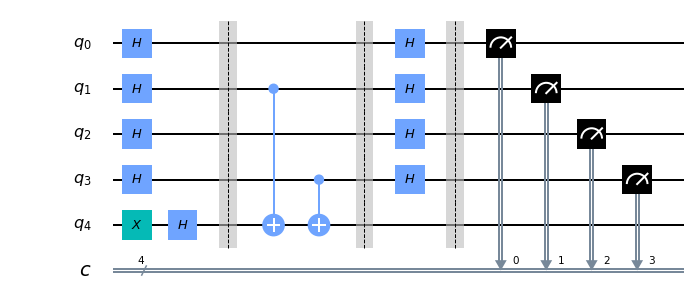

In [90]:
circuit.draw(output = 'mpl')

Behold the Bernstein-Vazirani Algorithm. Let's see how the circuit works

In [91]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1).result()
counts = result.get_counts()
print(counts)

{'1010': 1}


There it is. Our secret number